# Comparing cities with high service requests in Los Angeles' 311 2020 data  

Michael Gonzalez

This notebook will be another exploration of Los Angeles' 311 data with the focus on comparing two cities that have high service requests. The first city is Boyle Heights with the NC of 50. The second city is South Los Angeles, also known as south central with the NC of 78. Once again, I will be looking at the closed status of each requests with the created and serviced dates for the two cities. The data will be loaded into dataframes and pandas with the datetime libraries. The plots will be created from the seaborn and matplotlib libraries, just like the previous analysis.

## Breif Overview 

I will need to import useful libraries to timestamp and profile data to discover insights. This project benefited from looking for insights in the closing rate of the open requests. The data is orgainzed and has many useful columns to experiment with new ideas. The focus of this project is is comparing two cities that have the highest service requests for 2020. The cities that we will be looking at are Boyle Heights and South Los Angeles. I will include a bar chart that lead me to these two cities.

In [13]:
# Importing needed libraries.
import pandas as pd
import numpy as np
import pandas_profiling
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading the data into a Data Frame.
dfb = pd.read_csv('...\my311_data_analysis\MyLA311_Service_Request_Data_2020.csv')

# Displaying the top five rows of data.
dfb.head()

,SRNumber,CreatedDate,UpdatedDate,ActionTaken,Owner,RequestType,Status,RequestSource,CreatedByUserOrganization,MobileOS,...,Location,TBMPage,TBMColumn,TBMRow,APC,CD,CDMember,NC,NCName,PolicePrecinct
0,1-1523593381,01/01/2020 12:02:00 AM,01/07/2020 12:19:00 PM,SR Created,BOS,Illegal Dumping Pickup,Closed,Call,BOS,NaN,...,"(33.988984265, -118.302681205)",673.0,J,5.0,South Los Angeles APC,8.0,Marqueece Harris-Dawson,81.0,EMPOWERMENT CONGRESS CENTRAL AREA NDC,77TH STREET
1,1-1523590121,01/01/2020 12:05:00 AM,01/02/2020 08:43:00 AM,SR Created,BOS,Illegal Dumping Pickup,Closed,Call,BOS,NaN,...,"(34.1940284578, -118.499471638)",531.0,D,6.0,South Valley APC,6.0,Nury Martinez,19.0,LAKE BALBOA NC,WEST VALLEY
2,1-1523596201,01/01/2020 12:16:00 AM,01/02/2020 03:13:00 PM,SR Created,OCB,Graffiti Removal,Closed,Mobile App,Self Service,Android,...,"(34.0117235893, -118.312764174)",673.0,H,2.0,South Los Angeles APC,8.0,Marqueece Harris-Dawson,77.0,EMPOWERMENT CONGRESS NORTH AREA NDC,SOUTHWEST
3,1-1523596222,01/01/2020 12:19:00 AM,01/03/2020 07:02:00 AM,SR Created,BOS,Bulky Items,Closed,Mobile App,Self Service,Android,...,"(34.0724397675, -118.287797874)",634.0,A,1.0,Central APC,13.0,Mitch O'Farrell,53.0,RAMPART VILLAGE NC,OLYMPIC
4,1-1523591123,01/01/2020 12:21:00 AM,01/03/2020 03:54:00 PM,SR Created,BOS,Metal/Household Appliances,Closed,Mobile App,Self Service,Android,...,"(34.0724397675, -118.287797874)",634.0,A,1.0,Central APC,13.0,Mitch O'Farrell,53.0,RAMPART VILLAGE NC,OLYMPIC


## Exploratory Data Analysis 

In this section, I will include the bar chart that represented the count of the highest service requests for Los Angeles. Then I will looking for insights based on the service closed dates and other insights. Creating new variables that represents the CreatedDate, ClosedDate, and ServiceDate columns for a description of the data.

Text(0, 0.5, 'Count of service requests')

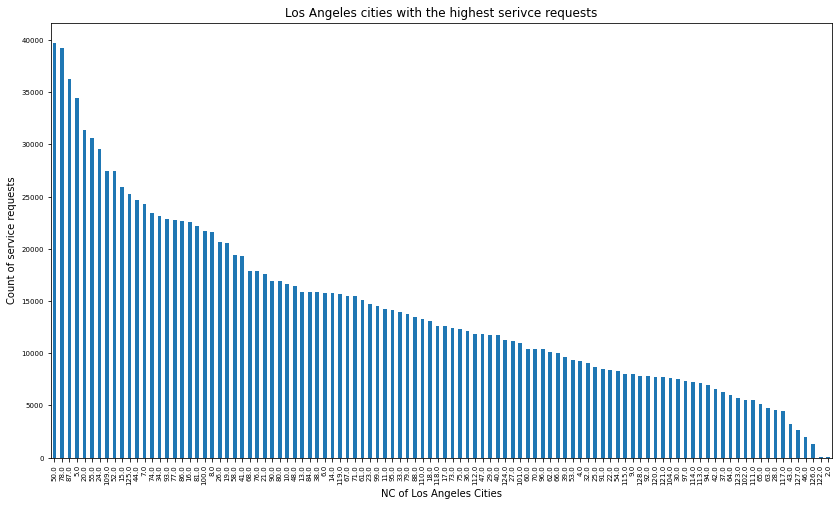

In [14]:
# Plotting a bar chart that will display the cities with the highest service request.
ax = dfb['NC'].value_counts().plot(kind = 'bar',
                                    figsize = (14, 8),
                                    fontsize = 7,
                                    title = "Los Angeles cities with the highest serivce requests")
ax.set_xlabel("NC of Los Angeles Cities")
ax.set_ylabel("Count of service requests")

In [15]:
# Creating a new variable that represents the listed columns with timestamp information.
dfb['CreatedDate'] = pd.to_datetime(dfb['CreatedDate'], errors = 'coerce')
dfb['ClosedDate'] = pd.to_datetime(dfb['ClosedDate'], errors = 'coerce')
dfb['ServiceDate'] = pd.to_datetime(dfb['ServiceDate'], errors = 'coerce')

In [16]:
# Continuing the previous step.
dfb['closed_created'] = dfb.ClosedDate - dfb.CreatedDate
dfb['service_created'] = dfb.ServiceDate - dfb.CreatedDate

In [17]:
# Checking the data for the sum of null values.
dfb.closed_created.isna().sum()

6278

In [18]:
# Checking the shape of the data.
dfb.shape

(1491773, 36)

## Checking the min ration of closed status for Boyle Heights & South Los Angeles 

In [19]:
# Checking the min ratio of a new column that has a closed status for NC 50 (Boyle Heights).
dfb['closed_createdD'] = dfb.closed_created / pd.Timedelta(days = 1)
dfbBH = dfb[(dfb.closed_createdD > (1.0 / 24.0)) & (dfb.Status == 'Closed') & (dfb.NC == 50)][['closed_createdD', 'RequestType']]
dfbBH.closed_createdD.min()

0.04173611111111111

There is still a minimum of 4% of open requests in Boyle Heights that has a closed status. This is similar to the results of Downtown Los Angeles. Now I will check for South Los Angeles.

In [20]:
# Checking the min ratio of a new column that has a closed status for NC 78 (South Los Angeles).
dfb['closed_createdD'] = dfb.closed_created / pd.Timedelta(days = 1)
dfbSLA = dfb[(dfb.closed_createdD > (1.0 / 24.0)) & (dfb.Status == 'Closed') & (dfb.NC == 78)][['closed_createdD', 'RequestType']]
dfbSLA.closed_createdD.min()

0.04172453703703704

Again, a minimum of 4% of open requests in South Los Angeles that has a closed status. It is a little lower than in Boyle Heights. Now, it is time to check the averages and color values for both cities.

## Checking the averages and color values for Boyle Heights & South Los Angeles 

In [21]:
# Comparing the averages of request types with the new column closed_createdD for NC 50 (Boyle Heights).
dfbBHavg = dfbBH.groupby(['RequestType']).agg(['mean', 'std']).reset_index().sort_values(by = ['RequestType'])
dfbBHavg

RequestType closed_createdD           
                                          mean        std
0                  Bulky Items        4.340000  12.882269
1          Dead Animal Removal        0.851793   2.981436
2             Electronic Waste        3.437135   6.260174
3                     Feedback        5.912865   7.054037
4             Graffiti Removal        7.239122  22.855790
5          Homeless Encampment       56.384177  91.033574
6       Illegal Dumping Pickup       11.073418  35.119882
7   Metal/Household Appliances        3.535390   8.852706
8   Multiple Streetlight Issue       20.327716  29.973225
9                        Other        1.983501   4.016099
10    Single Streetlight Issue       19.368312  32.994399

In [23]:
# Compairing the request type, closed_createdD with the color values for NC 50 (Boyle Heights).
dfbBHavg['colorvals'] = sns.color_palette('colorblind', 11)
dfbBHavg

RequestType closed_createdD             \
                                          mean        std   
0                  Bulky Items        4.340000  12.882269   
1          Dead Animal Removal        0.851793   2.981436   
2             Electronic Waste        3.437135   6.260174   
3                     Feedback        5.912865   7.054037   
4             Graffiti Removal        7.239122  22.855790   
5          Homeless Encampment       56.384177  91.033574   
6       Illegal Dumping Pickup       11.073418  35.119882   
7   Metal/Household Appliances        3.535390   8.852706   
8   Multiple Streetlight Issue       20.327716  29.973225   
9                        Other        1.983501   4.016099   
10    Single Streetlight Issue       19.368312  32.994399   

                                            colorvals  
                                                       
0   (0.00392156862745098, 0.45098039215686275, 0.6...  
1   (0.8705882352941177, 0.5607843137254902, 0.019...  
2   (0.00784313725490196, 0.6196078431372549, 0.45...  
3       (0.8352941176470589, 0.3686274509803922, 0.0)  
4      (0.8, 0.47058823529411764, 0.7372549019607844)  
5   (0.792156862745098, 0.5686274509803921, 0.3803...  
6   (0.984313725490196, 0.6862745098039216, 0.8941...  
7   (0.5803921568627451, 0.5803921568627451, 0.580...  
8       (0.9254901960784314, 0.8823529411764706, 0.2)  
9   (0.33725490196078434, 0.7058823529411765, 0.91...  
10  (0.00392156862745098, 0.45098039215686275, 0.6...

In [24]:
# Comparing the averages of request types with the new column closed_createdD for NC 78 (South Los Angles).
dfbSLAavg = dfbSLA.groupby(['RequestType']).agg(['mean', 'std']).reset_index().sort_values(by = ['RequestType'])
dfbSLAavg

RequestType closed_createdD           
                                         mean        std
0                 Bulky Items        4.779649  17.224473
1         Dead Animal Removal        0.438614   0.418419
2            Electronic Waste        2.509996   4.219792
3            Graffiti Removal        2.469910   8.222219
4         Homeless Encampment       54.951969  61.062844
5      Illegal Dumping Pickup       14.422841  37.755981
6  Metal/Household Appliances        2.716196   6.752852
7  Multiple Streetlight Issue       58.267671  74.668011
8                       Other        1.847854   2.242471
9    Single Streetlight Issue       29.942672  39.969482

In [25]:
# Compairing the request type, closed_createdD with the color values for NC 78 (South Los Angeles).
dfbSLAavg['colorvals'] = sns.color_palette('colorblind', 10)
dfbSLAavg

RequestType closed_createdD             \
                                         mean        std   
0                 Bulky Items        4.779649  17.224473   
1         Dead Animal Removal        0.438614   0.418419   
2            Electronic Waste        2.509996   4.219792   
3            Graffiti Removal        2.469910   8.222219   
4         Homeless Encampment       54.951969  61.062844   
5      Illegal Dumping Pickup       14.422841  37.755981   
6  Metal/Household Appliances        2.716196   6.752852   
7  Multiple Streetlight Issue       58.267671  74.668011   
8                       Other        1.847854   2.242471   
9    Single Streetlight Issue       29.942672  39.969482   

                                           colorvals  
                                                      
0  (0.00392156862745098, 0.45098039215686275, 0.6...  
1  (0.8705882352941177, 0.5607843137254902, 0.019...  
2  (0.00784313725490196, 0.6196078431372549, 0.45...  
3      (0.8352941176470589, 0.3686274509803922, 0.0)  
4     (0.8, 0.47058823529411764, 0.7372549019607844)  
5  (0.792156862745098, 0.5686274509803921, 0.3803...  
6  (0.984313725490196, 0.6862745098039216, 0.8941...  
7  (0.5803921568627451, 0.5803921568627451, 0.580...  
8      (0.9254901960784314, 0.8823529411764706, 0.2)  
9  (0.33725490196078434, 0.7058823529411765, 0.91...

## Data Visualizations 

In this next section of the notebook. I will talk about the visualization of my results. This will include a comparison of different request types for the cities of Boyle Heights and South Los Angeles. The visualizations will display the completion rate of requests related to the service request types.

[Text(0, 0.5, ''),
 Text(0.5, 0, 'Days to Completion'),
 Text(0.5, 1.0, 'The most completed requests in Boyle Heights')]

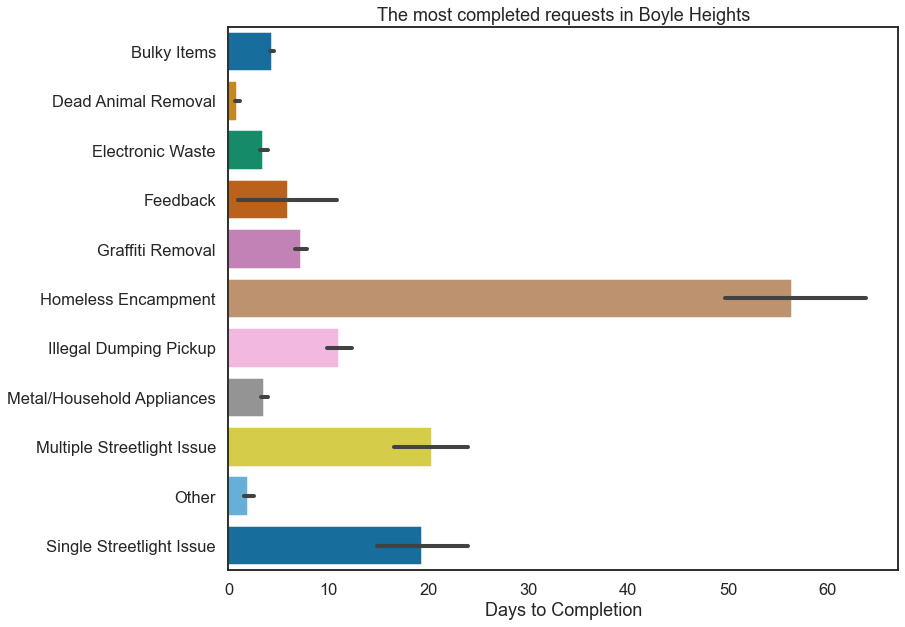

In [26]:
# Plotting a stacked bar chart of camparing the completion time with other requests for NC 50 (Boyle Heights).
plt.figure(figsize = (12, 10))
sns.set_style("white")
sns.set_context("talk")
ax = sns.barplot(y = 'RequestType', x = 'closed_createdD', data = dfbBH, order = dfbBHavg.RequestType, palette = list(dfbBHavg.colorvals))
bh_plot = ax.set(xlabel = 'Days to Completion', title = 'The most completed requests in Boyle Heights', ylabel = '')
bh_plot

[Text(0, 0.5, ''),
 Text(0.5, 0, 'Days to Completion'),
 Text(0.5, 1.0, 'The most completed requests in South Los Angeles')]

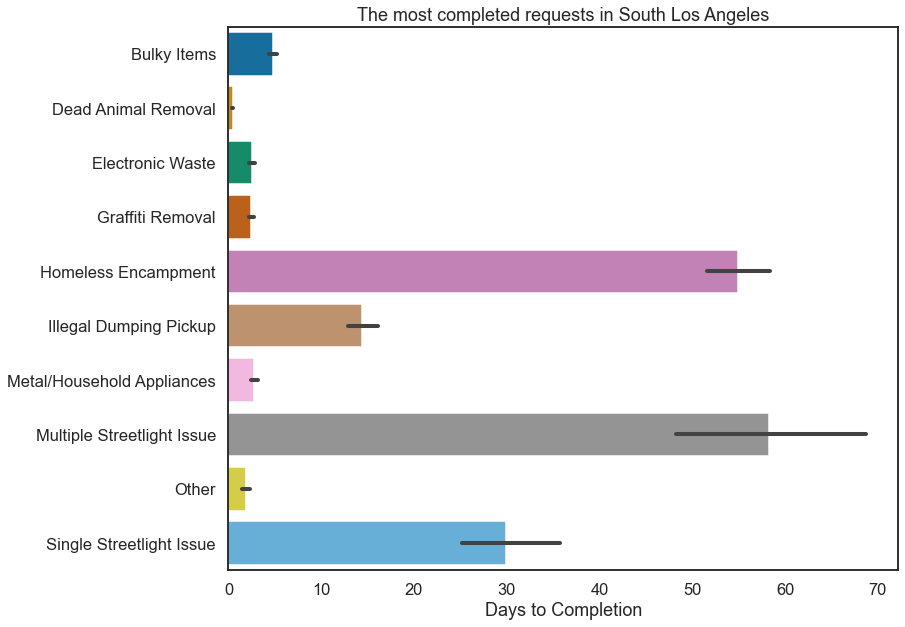

In [27]:
# Plotting a stacked bar chart of camparing the completion time with other requests for NC 78 (South Los Angeles).
plt.figure(figsize = (12, 10))
sns.set_style("white")
sns.set_context("talk")
ax = sns.barplot(y = 'RequestType', x = 'closed_createdD', data = dfbSLA, order = dfbSLAavg.RequestType, palette = list(dfbSLAavg.colorvals))
sla_plot = ax.set(xlabel = 'Days to Completion', title = 'The most completed requests in South Los Angeles', ylabel = '')
sla_plot

## Conclusion 

After comparing the stacked bar chart for Boyle Heights with South Los Angeles. I was able to see some similarities, such as dead animal removal request was the fastest to complete for both cities. Another similarity was the three requests that took the longest to complete for both cities, which are homeless encampment, multiple streetlight issue and single streetlight issue. 

Even though, both cities have the same request types. In Boyle Heights, the homeless encampment service request type took the longest to complete and it shows that it is an ongoing issue. Switching to South Los Angeles, the multiple streetlight issue service request type took the longest to complete. The ongoing issue to complete the mulitple streetlight issue could be based on many factors, such as not having any available workers or replacement parts.